
# 📘 The Perceptron: The Simplest Neural Network

The **perceptron** is the most basic type of neural network, consisting of a single neuron. It takes multiple inputs, applies corresponding weights, adds a bias, and passes the result through an activation function to produce an output.

### 📐 Mathematical Representation

Given inputs $ x_1, x_2, \ldots, x_n \), weights \( w_1, w_2, \ldots, w_n \), and bias \( b $:

$$
z = \sum_{i=1}^{n} w_i x_i + b
$$

$$
\hat{y} = \phi(z)
$$

Where:

- $ z $ is the weighted sum  
- $ \phi $ is the activation function  
- $ \hat{y} $ is the output


---

## 🔧 Activation Functions

### a. Sigmoid Function

$$
\phi(z) = \frac{1}{1 + e^{-z}}
$$

- Output range: \( (0, 1) \)  
- Commonly used in binary classification

### b. Tanh Function

$$
\phi(z) = \tanh(z) = \frac{e^{z} - e^{-z}}{e^{z} + e^{-z}}
$$

- Output range: \( (-1, 1) \)  
- Zero-centered, which can aid in optimization

### c. ReLU (Rectified Linear Unit)

$$
\phi(z) = \max(0, z)
$$

- Output range: $\( [0, \infty) \)$
- Efficient and widely used in hidden layers



# [Perceptron::Forward Pass] Numpy implementation

In [1]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Inputs
x = np.array([0.5, -0.2, 0.1])
# Weights
w = np.array([0.4, 0.7, -0.5])
# Bias
b = 0.1

# Weighted sum
z = np.dot(w, x) + b
# Activation
output = sigmoid(z)

print(f"Output: {output}")

Output: 0.5274723043445937


# [Perceptron::Forward Pass] Pytorch implementation

In [2]:
import torch

# Inputs
x = torch.tensor([0.5, -0.2, 0.1])
# Weights
w = torch.tensor([0.4, 0.7, -0.5])
# Bias
b = torch.tensor(0.1)

# Weighted sum
z = torch.dot(w, x) + b
# Activation
output = torch.sigmoid(z)

print(f"Output: {output.item()}")

Output: 0.5274722576141357


# [Theory] Multi-Layer Perceptron (MLP) with Backpropagation

### 🔹 Forward Pass:

Given input $ x \in \mathbb{R}^d , labels y \in \mathbb{R}$:

#### Layer 1:
$$
z^{(1)} = W^{(1)} x + b^{(1)} \\
a^{(1)} = \text{ReLU}(z^{(1)})
$$

#### Layer 2:
$$
z^{(2)} = W^{(2)} a^{(1)} + b^{(2)} \\
\hat{y} = \sigma(z^{(2)})
$$

---

### 🔹 Loss Function:

Binary Cross-Entropy:
$$
L = - \left[ y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right]
$$

---

### 🔁 Backward Pass:

#### Output Layer:
$$
\delta^{(2)} = \hat{y} - y \\
\frac{\partial L}{\partial W^{(2)}} = \delta^{(2)} \cdot (a^{(1)})^T \\
\frac{\partial L}{\partial b^{(2)}} = \delta^{(2)}
$$

#### Hidden Layer:
$$
\delta^{(1)} = (W^{(2)})^T \delta^{(2)} \odot \mathbb{1}_{z^{(1)} > 0} \\
\frac{\partial L}{\partial W^{(1)}} = \delta^{(1)} \cdot x^T \\
\frac{\partial L}{\partial b^{(1)}} = \delta^{(1)}
$$

# MLP with One Hidden Layer

We'll build:
- 2-layer MLP
- Input → Hidden (ReLU) → Output (Sigmoid or Linear)

## [Numpy code]

In [3]:
import numpy as np

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Inputs
X = np.array([[0.5, -0.2, 0.1]])  # (1, 3)
# Ground truth (dummy)
y = np.array([[1]])

# Weights and biases initialization
np.random.seed(42)
W1 = np.random.randn(3, 4)   # Input to hidden
b1 = np.zeros((1, 4))
W2 = np.random.randn(4, 1)   # Hidden to output
b2 = np.zeros((1, 1))

# Forward pass
z1 = X @ W1 + b1
a1 = relu(z1)

z2 = a1 @ W2 + b2
a2 = sigmoid(z2)

print("Output prediction:", a2)

Output prediction: [[0.42146409]]


## [PyTorch Code]

In [4]:
import torch
import torch.nn.functional as F

# Input
X = torch.tensor([[0.5, -0.2, 0.1]])
y = torch.tensor([[1.0]])

# Manual weights
torch.manual_seed(42)
W1 = torch.randn(3, 4, requires_grad=True)
b1 = torch.zeros(4, requires_grad=True)
W2 = torch.randn(4, 1, requires_grad=True)
b2 = torch.zeros(1, requires_grad=True)

# Forward pass
z1 = X @ W1 + b1
a1 = F.relu(z1)

z2 = a1 @ W2 + b2
a2 = torch.sigmoid(z2)

print("Output prediction:", a2.item())

Output prediction: 0.6412115097045898


# 2 Layer MLP

## Given:

Input $x \in \mathbb{R}^d$, labels $y \in \mathbb{R}$

**Network:**

- **Layer 1:** $z_1 = W_1 x + b_1,\quad a_1 = \text{ReLU}(z_1)$  
- **Layer 2:** $z_2 = W_2 a_1 + b_2,\quad \hat{y} = \sigma(z_2)$

**Loss:**

$$
L = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

---

## Goal: Compute gradients w.r.t parameters:

- $\frac{\partial L}{\partial W_2},\quad \frac{\partial L}{\partial b_2}$
- $\frac{\partial L}{\partial W_1},\quad \frac{\partial L}{\partial b_1}$

---

## Derivatives:

Let’s denote:

$$
\delta_2 = \hat{y} - y \quad \text{(from binary cross-entropy + sigmoid)}
$$

$$
\frac{\partial L}{\partial W_2} = \delta_2 \cdot a_1^T
$$

$$
\delta_1 = (W_2^T \delta_2) \cdot \mathbb{1}_{z_1 > 0} \quad \text{(ReLU gradient)}
$$

$$
\frac{\partial L}{\partial W_1} = \delta_1 \cdot x^T
$$

## [Code] NumPy: Full Training Loop with Backprop

Epoch 0, Loss: 1.4788
Epoch 100, Loss: 0.8296
Epoch 200, Loss: 0.7299
Epoch 300, Loss: 0.7017
Epoch 400, Loss: 0.6898
Epoch 500, Loss: 0.6821
Epoch 600, Loss: 0.6789
Epoch 700, Loss: 0.6763
Epoch 800, Loss: 0.6742
Epoch 900, Loss: 0.6725


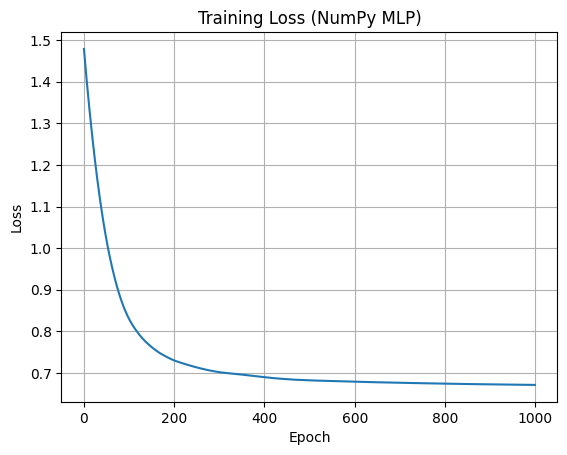

In [5]:
import numpy as np

# Activation + Derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def binary_cross_entropy(y_true, y_pred):
    eps = 1e-8
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

# Data
np.random.seed(42)
X = np.random.randn(100, 3)  # 100 samples, 3 features
y = (np.random.rand(100, 1) > 0.5).astype(float)  # Binary labels

# Params
input_size, hidden_size, output_size = 3, 4, 1
W1 = np.random.randn(input_size, hidden_size)      # (3, 4)
b1 = np.zeros((1, hidden_size))                    # (1, 4)
W2 = np.random.randn(hidden_size, output_size)     # (4, 1)
b2 = np.zeros((1, output_size))                    # (1, 1)

# Training Loop
lr = 0.01
losses = []

for epoch in range(1000):
    # Forward
    z1 = X @ W1 + b1      # shape: (100, 4)
    a1 = relu(z1)         # apply ReLU to hidden layer
    
    z2 = a1 @ W2 + b2     # shape: (100, 1)
    a2 = sigmoid(z2)      # predicted probabilities

    # Loss
    loss = binary_cross_entropy(y, a2)
    losses.append(loss)

    # Backward
    delta2 = a2 - y  # (100, 1)
    dW2 = a1.T @ delta2 / X.shape[0]  # (4, 1)
    db2 = np.mean(delta2, axis=0, keepdims=True)  # (1, 1)

    delta1 = (delta2 @ W2.T) * relu_derivative(z1)  # shape: (100, 4)
    dW1 = X.T @ delta1 / X.shape[0]  # (3, 4)
    db1 = np.mean(delta1, axis=0, keepdims=True)  # (1, 4)

    # Update
    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

import matplotlib.pyplot as plt
plt.plot(losses)
plt.title("Training Loss (NumPy MLP)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# [Code] PyTorch (no `nn` module)

In [6]:
import torch
import torch.nn.functional as F

# Seed for reproducibility
torch.manual_seed(42)

# Data
X = torch.randn(100, 3)                # 100 samples, 3 features
y = (torch.rand(100, 1) > 0.5).float() # Binary targets (0 or 1)

# Weights and Biases (manually initialized)
W1 = torch.randn(3, 4, requires_grad=True)  # input → hidden
b1 = torch.zeros(4, requires_grad=True)

W2 = torch.randn(4, 1, requires_grad=True)  # hidden → output
b2 = torch.zeros(1, requires_grad=True)

# Training loop
lr = 0.01
for epoch in range(1000):
    # Forward pass
    z1 = X @ W1 + b1         # shape: (100, 4)
    a1 = F.relu(z1)          # ReLU activation

    z2 = a1 @ W2 + b2        # shape: (100, 1)
    y_pred = torch.sigmoid(z2)

    # Binary Cross Entropy Loss
    loss = F.binary_cross_entropy(y_pred, y)

    # Backward
    loss.backward()

    # Gradient Descent (manual step)
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

        # Manually zero gradients
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 1.0545
Epoch 100, Loss: 0.8494
Epoch 200, Loss: 0.7646
Epoch 300, Loss: 0.7262
Epoch 400, Loss: 0.7032
Epoch 500, Loss: 0.6894
Epoch 600, Loss: 0.6786
Epoch 700, Loss: 0.6711
Epoch 800, Loss: 0.6654
Epoch 900, Loss: 0.6575


# [Code] With Autograd

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Data
torch.manual_seed(42)
X = torch.randn(100, 3)
y = (torch.rand(100, 1) > 0.5).float()

# Model using nn.Sequential (simplifies construction)
model = nn.Sequential(
    nn.Linear(3, 4),  # input → hidden
    nn.ReLU(),        # activation
    nn.Linear(4, 1),  # hidden → output
    nn.Sigmoid()      # sigmoid activation
)

# Loss and optimizer
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.6771
Epoch 100, Loss: 0.6752
Epoch 200, Loss: 0.6736
Epoch 300, Loss: 0.6722
Epoch 400, Loss: 0.6708
Epoch 500, Loss: 0.6696
Epoch 600, Loss: 0.6684
Epoch 700, Loss: 0.6674
Epoch 800, Loss: 0.6663
Epoch 900, Loss: 0.6653


# [Extension] Multi-class Classification

## [Numpy] Multiclass

In [8]:
import torch
import torch.nn.functional as F

# Set seed for reproducibility
torch.manual_seed(42)

# --- Data Preparation ---
num_samples = 100     # Number of data points
input_dim = 3         # Features
hidden_dim = 4        # Hidden neurons
num_classes = 3       # Number of classes

# Random input data: shape (100, 3)
X = torch.randn(num_samples, input_dim)

# Random integer labels: shape (100,) with values {0, 1, 2}
y = torch.randint(0, num_classes, (num_samples,))

# --- Weight Initialization ---
# Input → Hidden
W1 = torch.randn(input_dim, hidden_dim, requires_grad=True)   # (3, 4)
b1 = torch.zeros(hidden_dim, requires_grad=True)              # (4,)

# Hidden → Output
W2 = torch.randn(hidden_dim, num_classes, requires_grad=True) # (4, 3)
b2 = torch.zeros(num_classes, requires_grad=True)             # (3,)

# --- Training Loop ---
lr = 0.01
for epoch in range(1000):

    # ----- Forward Pass -----
    z1 = X @ W1 + b1          # (100, 4), Linear transformation
    a1 = F.relu(z1)           # (100, 4), Apply ReLU activation

    z2 = a1 @ W2 + b2         # (100, 3), Output logits for each class
    y_pred = F.log_softmax(z2, dim=1)  # (100, 3), log-probabilities via softmax

    # ----- Loss -----
    # Negative log-likelihood loss using class indices
    loss = F.nll_loss(y_pred, y)

    # ----- Backward Pass -----
    loss.backward()

    # ----- Parameter Updates -----
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

        # Zero gradients for next step
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

    # ----- Monitoring -----
    if epoch % 100 == 0:
        pred_classes = torch.argmax(y_pred, dim=1)         # (100,)
        accuracy = (pred_classes == y).float().mean()      # Compute accuracy
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}")


Epoch 0, Loss: 2.3151, Accuracy: 0.25
Epoch 100, Loss: 1.4549, Accuracy: 0.33
Epoch 200, Loss: 1.2082, Accuracy: 0.38
Epoch 300, Loss: 1.1233, Accuracy: 0.40
Epoch 400, Loss: 1.0905, Accuracy: 0.40
Epoch 500, Loss: 1.0750, Accuracy: 0.42
Epoch 600, Loss: 1.0656, Accuracy: 0.39
Epoch 700, Loss: 1.0588, Accuracy: 0.38
Epoch 800, Loss: 1.0533, Accuracy: 0.38
Epoch 900, Loss: 1.0484, Accuracy: 0.38


## [PyTorch] Multiclass

In [9]:
import torch
import torch.nn.functional as F

# Seed for reproducibility
torch.manual_seed(42)

# -----------------------------
# Data Preparation
# -----------------------------
num_samples = 100
input_dim = 3
hidden_dim = 4
num_classes = 3

# Input features: shape (100, 3)
X = torch.randn(num_samples, input_dim)

# Integer class labels: shape (100,)
y = torch.randint(0, num_classes, (num_samples,))

# -----------------------------
# Manual Parameter Initialization
# -----------------------------
# Input → Hidden
W1 = torch.randn(input_dim, hidden_dim, requires_grad=True)  # (3, 4)
b1 = torch.zeros(hidden_dim, requires_grad=True)             # (4,)

# Hidden → Output (now outputting num_classes logits)
W2 = torch.randn(hidden_dim, num_classes, requires_grad=True)  # (4, 3)
b2 = torch.zeros(num_classes, requires_grad=True)              # (3,)

# -----------------------------
# Training Loop
# -----------------------------
lr = 0.01
for epoch in range(1000):
    # ----- Forward Pass -----
    z1 = X @ W1 + b1         # (100, 4) → Linear transform
    a1 = F.relu(z1)          # (100, 4) → Nonlinear activation

    z2 = a1 @ W2 + b2        # (100, 3) → Output logits
    y_log_probs = F.log_softmax(z2, dim=1)  # (100, 3)

    # ----- Loss -----
    # Negative Log-Likelihood Loss (log_softmax + class labels)
    loss = F.nll_loss(y_log_probs, y)

    # ----- Backward Pass -----
    loss.backward()

    # ----- Weight Update -----
    with torch.no_grad():
        W1 -= lr * W1.grad
        b1 -= lr * b1.grad
        W2 -= lr * W2.grad
        b2 -= lr * b2.grad

        # Clear gradients
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()

    # ----- Logging -----
    if epoch % 100 == 0:
        # Get predicted class via argmax over log-probs
        predictions = torch.argmax(y_log_probs, dim=1)
        accuracy = (predictions == y).float().mean()
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}")


Epoch 0, Loss: 2.3151, Accuracy: 0.25
Epoch 100, Loss: 1.4549, Accuracy: 0.33
Epoch 200, Loss: 1.2082, Accuracy: 0.38
Epoch 300, Loss: 1.1233, Accuracy: 0.40
Epoch 400, Loss: 1.0905, Accuracy: 0.40
Epoch 500, Loss: 1.0750, Accuracy: 0.42
Epoch 600, Loss: 1.0656, Accuracy: 0.39
Epoch 700, Loss: 1.0588, Accuracy: 0.38
Epoch 800, Loss: 1.0533, Accuracy: 0.38
Epoch 900, Loss: 1.0484, Accuracy: 0.38


## [Multiclass code using `nn.Module`]

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Seed for reproducibility
torch.manual_seed(42)

# -----------------------------
# Data Preparation
# -----------------------------
num_samples = 100
input_dim = 3
hidden_dim = 4
num_classes = 3

# Input features: (100, 3)
X = torch.randn(num_samples, input_dim)

# Integer class labels: (100,) with values in {0, 1, 2}
y = torch.randint(0, num_classes, (num_samples,))

# -----------------------------
# Define MLP using nn.Module
# -----------------------------
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input → Hidden
        self.fc2 = nn.Linear(hidden_size, output_size) # Hidden → Output

    def forward(self, x):
        x = F.relu(self.fc1(x))        # Apply ReLU after first layer
        x = self.fc2(x)                # No softmax here!
        return x                       # Return raw logits

# Instantiate model
model = MLPClassifier(input_dim, hidden_dim, num_classes)

# -----------------------------
# Loss Function + Optimizer
# -----------------------------
criterion = nn.CrossEntropyLoss()          # Combines LogSoftmax + NLLLoss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# -----------------------------
# Training Loop
# -----------------------------
for epoch in range(1000):
    logits = model(X)                      # Forward pass → raw logits
    loss = criterion(logits, y)            # Cross-entropy between logits & targets

    optimizer.zero_grad()                  # Reset gradients
    loss.backward()                        # Backpropagation
    optimizer.step()                       # Update weights

    if epoch % 100 == 0:
        predictions = torch.argmax(logits, dim=1)
        accuracy = (predictions == y).float().mean()
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}")


Epoch 0, Loss: 1.1444, Accuracy: 0.36
Epoch 100, Loss: 1.0886, Accuracy: 0.40
Epoch 200, Loss: 1.0669, Accuracy: 0.43
Epoch 300, Loss: 1.0584, Accuracy: 0.40
Epoch 400, Loss: 1.0547, Accuracy: 0.40
Epoch 500, Loss: 1.0527, Accuracy: 0.41
Epoch 600, Loss: 1.0512, Accuracy: 0.42
Epoch 700, Loss: 1.0499, Accuracy: 0.42
Epoch 800, Loss: 1.0487, Accuracy: 0.42
Epoch 900, Loss: 1.0474, Accuracy: 0.42
